In [1]:
from scipy.ndimage import gaussian_filter
import math
import matplotlib.pyplot as plt
from contour_scanning import *

In [2]:
noisy_data, synth_data, block_height, core_height = generate_synthetic_data()

Core height is 38.734934014340126


Text(0.5, 1.0, 'Synthetic data')

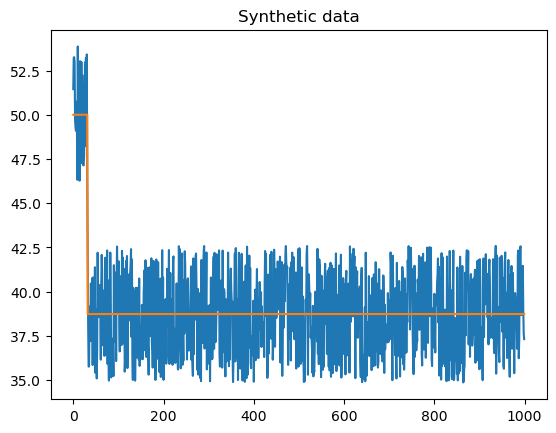

In [3]:
# View the generated data with and without noise
x_axis = [i for i in range(len(noisy_data))]
plt.figure()
plt.plot(x_axis, noisy_data, synth_data)
plt.title("Synthetic data")

In [4]:
# Smooth the noisy data, apply the detection algorithm on this, and view the results
smoothed = gaussian_filter(noisy_data, sigma=1)
start, end = detect_obstacle(data=smoothed)

detected = smoothed.copy()
low = math.inf
for i in range(len(detected)):
    if detected[i] < low:
        low = detected[i]
for i in range(len(detected)):
    if start <= i and i <= end:
        detected[i] = block_height
    else:
        detected[i] = core_height

Text(0.5, 1.0, 'Detected edges')

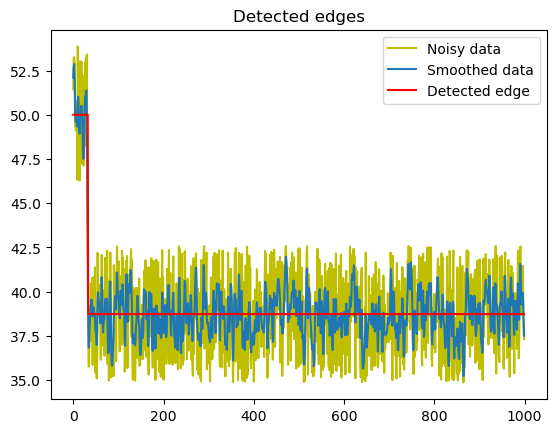

In [5]:
plt.figure()
plt.plot(x_axis, noisy_data, "y")
plt.plot(x_axis, smoothed)
plt.plot(x_axis, detected, "r")
plt.legend(["Noisy data", "Smoothed data", "Detected edge"])
plt.title("Detected edges")

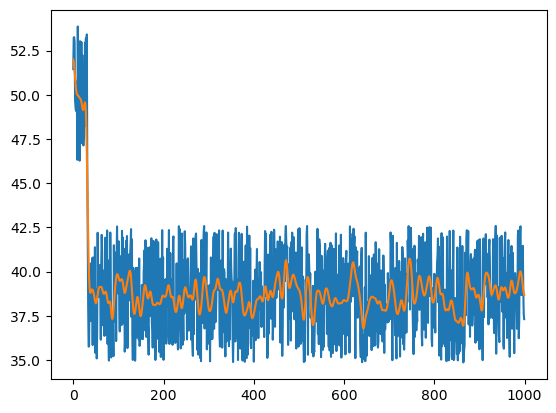

In [6]:
smoothed = gaussian_filter(smoothed, sigma=3);
x_axis = [i for i in range(len(noisy_data))]
plt.plot(x_axis, noisy_data, smoothed)